In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:/Users/91882/Downloads/prices_split_adjusted.csv')

In [3]:
# df.drop(['date', 'symbol'], inplace = True, axis = 1)

In [4]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
#changing the order of columns
col=list(df.columns)
col
df=df[[col[2]] + col[4:] + [col[3]]]

In [9]:
df

,open,low,high,volume,close
0,123.430000,122.309998,126.250000,2163600.0,125.839996
1,125.239998,119.940002,125.540001,2386400.0,119.980003
2,116.379997,114.930000,119.739998,2489500.0,114.949997
3,115.480003,113.500000,117.440002,2006300.0,116.620003
4,117.010002,114.089996,117.330002,1408600.0,114.970001
...,...,...,...,...,...
851259,103.309998,102.849998,103.930000,973800.0,103.199997
851260,43.070000,42.689999,43.310001,1938100.0,43.040001
851261,53.639999,53.270000,53.740002,1701200.0,53.529999
851262,44.730000,44.410000,45.590000,1380900.0,45.450001


In [10]:
df.isna().sum()

open      0
low       0
high      0
volume    0
close     0
dtype: int64

In [7]:
# #important
# data = df[['open', 'low', 'high', 'volume']]
# target = df[['close']]

In [13]:
df=df.values
data=df[:,:-1]
target=df[:,-1]

In [14]:
# data = data.values
# target = target.values

In [15]:
data

array([[1.23430000e+02, 1.22309998e+02, 1.26250000e+02, 2.16360000e+06],
       [1.25239998e+02, 1.19940002e+02, 1.25540001e+02, 2.38640000e+06],
       [1.16379997e+02, 1.14930000e+02, 1.19739998e+02, 2.48950000e+06],
       ...,
       [5.36399990e+01, 5.32700000e+01, 5.37400020e+01, 1.70120000e+06],
       [4.47300000e+01, 4.44100000e+01, 4.55900000e+01, 1.38090000e+06],
       [5.42000010e+01, 5.33899990e+01, 5.44800000e+01, 7.05100000e+05]])

In [16]:
target

array([125.839996, 119.980003, 114.949997, ...,  53.529999,  45.450001,
        53.630001])

In [17]:
data.shape,target.shape

((851264, 4), (851264,))

In [18]:
# Normalization
u=np.mean(data,axis=0)
std=np.std(data,axis=0)
data=(data-u)/std

In [19]:
ones=np.ones((data.shape[0],1))
data=np.hstack((ones,data))

In [20]:
data

array([[ 1.        ,  0.77703978,  0.77859074,  0.79848234, -0.26023189],
       [ 1.        ,  0.80110767,  0.7467614 ,  0.78912878, -0.24240029],
       [ 1.        ,  0.68329454,  0.67947645,  0.71271927, -0.23414878],
       ...,
       [ 1.        , -0.15097125, -0.14862502, -0.15676781, -0.29723966],
       [ 1.        , -0.26944921, -0.26761592, -0.26413633, -0.32287458],
       [ 1.        , -0.14352479, -0.14701342, -0.14701904, -0.37696162]])

In [21]:
# Splitting data into training and testing
split=0.8
train_x=data[:int(split*data.shape[0]),:]
test_x=data[int(split*data.shape[0]):,:]
train_y=target[:int(split*target.shape[0])]
test_y=target[int(split*target.shape[0]):]

In [22]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((681011, 5), (170253, 5), (681011,), (170253,))

# Model building

In [23]:
def hypothesis(x, weights):
    return np.dot(x, weights)

In [24]:
def loss_func(x, weights, y):
    loss = 0
    y_pred = hypothesis(x, weights)
    loss = np.sum((y_pred - y)**2)
    return loss/x.shape[0]

In [25]:
def gradient(x, y, weights):
    y_pred = hypothesis(x, weights)
    grad = np.dot(x.T, (y_pred - y))
        
    return grad/x.shape[0]

In [26]:
def gradient_descent(x, y):
    weights = np.zeros((x.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 1000
    
    for i in range(epochs):
        
        grad = gradient(x, y, weights)
        
        loss_epoch.append(loss_func(x, weights, y))
        
        weights = weights - lr_rate * grad
        
    return weights, loss_epoch

In [27]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_x, train_y)
print(time.time() - start)

62.81185460090637


In [28]:
weights

array([ 6.50071258e+01,  2.49518962e+01,  2.51248311e+01,  2.51113415e+01,
       -6.83003928e-03])

In [29]:
loss_epoch

[7946.192295486229,
 7227.2865232918975,
 6585.014378107774,
 6010.185372304304,
 5494.7876527426615,
 5031.831762187787,
 4615.215427832189,
 4239.60652799684,
 3900.341775201951,
 3593.338988255744,
 3315.0211149639454,
 3062.250416710264,
 2832.2714418489727,
 2622.6616012070795,
 2431.2883200078813,
 2256.271879649191,
 2095.953182977471,
 1948.8657805675143,
 1813.7115852694808,
 1689.3397798417307,
 1574.7284895083974,
 1468.9688491981399,
 1371.251145273517,
 1280.852754818468,
 1197.1276429386148,
 1119.4972108439433,
 1047.442315415354,
 980.4963051016643,
 918.2389378663935,
 860.2910649489626,
 806.3099798068229,
 755.9853450955569,
 709.0356222097942,
 665.2049379967323,
 624.260331980145,
 585.9893349809373,
 550.1978365504297,
 516.7082042826066,
 485.3576229609453,
 455.9966257271554,
 428.4877931223307,
 402.70459902261763,
 378.53038523803406,
 355.857448922031,
 334.5862290004585,
 314.62457961469937,
 295.88712012199784,
 278.29465253848934,
 261.77363847487885,
 246

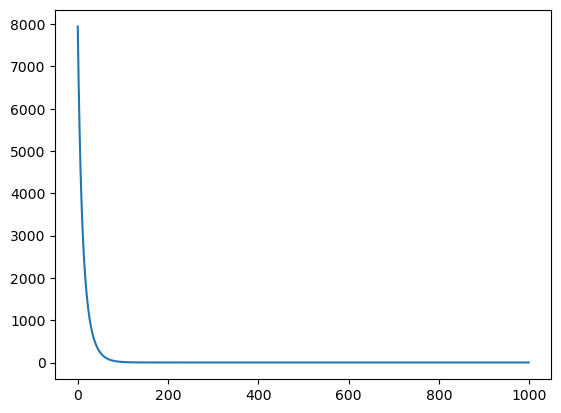

In [30]:
plt.plot(loss_epoch)
plt.show()

In [31]:
y_pred = []

for i in range(test_x.shape[0]):
    pred = hypothesis(test_x[i], weights)
    print(pred, test_y[i],sep='\t')
    y_pred.append(pred)

99.65503104486734	97.75
84.90581682897057	83.040001
40.54489129744416	39.75
91.30632607140144	88.68
43.91780129707029	42.630001
71.35995486317513	69.690002
45.28136324468584	43.52
39.01194204815069	37.0
89.14528886117277	87.019997
53.814119559401554	52.099998
32.079079292492885	31.139999
134.90223488285852	132.179993
160.33227016707326	153.259995
112.46803895799043	109.980003
32.59275853586909	31.82
83.65416786212172	80.559998
96.6319399791437	94.459999
29.175266188175616	28.82
62.69758940978183	60.830002
41.30489501837645	39.759998
91.93420068330703	88.800003
70.02564299832666	66.970001
79.46224031278055	77.099998
70.57687699862471	69.129997
39.472834468002226	38.580002
59.76513510432286	57.610001
89.47937789969073	86.010002
87.81577693623119	84.800003
72.76824750940061	70.769997
67.0953947813087	65.919998
124.81448272871629	121.169998
57.22413529745207	54.959999
45.00589081386997	43.5
119.36712692318376	116.830002
83.95554772679061	81.0
77.70342497849623	75.160004
48.705028743098126	

75.94100219985711	75.489998
11.737517105203104	11.67
31.187099662671756	31.370001
66.53290995757621	67.419998
61.11565692479511	61.669998
31.735559728649406	31.8397094718
128.2340373798726	130.210007
59.83876137757512	58.939999
46.16286491111365	45.98
50.16539324970072	50.290001
40.047610751173615	40.009998
105.64917370389537	105.629997
54.63089150940059	54.73
14.039807279398692	14.21
13.92409043578936	14.06
36.79386880338341	37.02
34.45330701406061	34.084999
83.42628843988778	82.779999
156.1808355092344	156.130005
16.228509436229576	16.110001
85.24322885382182	84.589996
166.3310702512879	167.610001
137.86661113802816	138.5
52.784253015903076	52.7039986
69.67618214743663	69.230003
117.69986855987881	117.050003
174.5624523648318	174.339996
34.74875733305126	34.66
105.14711349675592	103.199997
41.47969545651173	41.220001
23.45718197604925	23.35
59.00061663492585	58.700001
28.95726064383658	28.93
510.59230263828005	516.570007
93.17037064796273	93.540001
33.3833203949859	33.200001
77.39397

61.7709168844394	61.099998
19.185900585052003	19.540001
32.841128342476004	32.43
82.98549503320073	84.440002
126.07446728788773	127.849998
38.17716906078415	37.669998
152.53364703817567	153.690002
22.82603306069649	22.9
54.4306218057393	54.650002
70.81564773280937	71.550003
23.40017952151428	23.370001
27.197497591299012	27.85
22.770353605789307	22.42
81.80937918003622	82.440002
23.34082002260355	23.799999
59.88430578684359	60.509998
66.71618643611103	67.440002
95.43999037260612	95.639999
83.79351398234144	83.540001
86.0683688890983	85.870003
69.18249007840731	69.760002
47.05197580840489	46.759998
54.53972352146082	54.740002
74.70570333824018	74.610001
48.86418938282409	48.59
71.67242773132152	71.860001
65.4136732056624	65.940002
27.34555088499159	27.709999
64.70940623937828	64.7081152389
96.32020704479848	96.900002
26.57579858090859	26.9
26.146631937764585	26.43
66.26207901873914	65.040001
73.69939749423192	74.760002
77.86921190531692	77.260002
96.99083837967748	96.93
53.83270693320185

40.17212176948094	40.66
81.94686959875361	82.75
34.148822705683024	34.459999
110.95370044397072	112.519997
18.22229260214343	18.370001
47.75599850555511	47.509998
42.71496498877005	42.970001
97.98649023136208	98.900002
84.66161404058568	85.199997
52.52688226792782	53.810001
72.79071452196823	73.389999
107.85463750318569	109.400002
37.138124135553305	37.57
131.96631238688892	131.210007
72.6553710362325	73.360001
268.2475602022628	269.75
87.71922621196624	88.379997
88.1482773212761	89.209999
22.363872517911002	22.52
111.6173518142457	113.120003
140.4831912126602	142.25
39.72800024225453	39.93
51.33685958766797	51.380001
48.80604116737679	49.200001
62.4751932140107	64.150002
50.78876990220914	50.68
74.33769178427625	74.980003
361.54589380154175	365.470001
7.9915417853838076	8.12
42.780039505469354	43.18
72.5032480808002	72.739998
11.45839851566359	11.71
96.27957022809612	97.110001
111.01445495690439	112.980003
178.65348606314274	179.779999
58.09353825061991	58.529999
33.546094369413744	33

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Checking accuracy

In [32]:
def MSE(y_t,y_p):
    err=np.sum((y_t-y_p)**2)
    err=err/y_t.shape[0]
    return err

In [33]:
def MAE(y_t,y_p):
    err=(abs((y_t-y_p))).sum()
    err=err/y_t.shape[0]
    return err

In [34]:
def RMSE(y_t,y_p):
    err=np.sum((y_t-y_p)**2)
    err=(err/y_t.shape[0])**0.5
    return err

In [35]:
print(MSE(test_y,y_pred))
print(RMSE(test_y,y_pred))
print(MAE(test_y,y_pred))

1.3891854461441107
1.1786371138497678
0.5760518426578495


In [36]:
def R2_score(y_t, y_p):
    numerator = np.sum((y_t - y_p)**2)
    denominator = np.sum((y_t - np.array(y_p).mean())**2)
    return 1 - numerator/denominator

In [37]:
print(R2_score(test_y, y_pred))

0.9998679496117726


In [38]:
from sklearn import metrics

In [39]:
y_pred=hypothesis(test_x,weights)
print(y_pred.shape)

(170253,)


In [40]:
print('MSE',metrics.mean_squared_error(y_pred,test_y))
print('RMSE',metrics.mean_squared_error(y_pred,test_y)**0.5)
print('MAE',metrics.mean_absolute_error(y_pred,test_y))

MSE 1.3891854461441104
RMSE 1.1786371138497678
MAE 0.5760518426578494


In [41]:
print('R2 Score',metrics.r2_score(y_pred,test_y))

R2 Score 0.9998678578326198
